In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [38]:
# Load training data
data = pd.read_csv("Google_Stock_Train.csv")
train = data[['Open']].values  # Use only the 'Open' price

In [39]:

# Normalize the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)


In [40]:
# Prepare sequences (60 time steps -> 1 target)
X_train, y_train = [], []
for i in range(60, len(train_scaled)):
    X_train.append(train_scaled[i-60:i])
    y_train.append(train_scaled[i])

X_train, y_train = np.array(X_train), np.array(y_train)

In [41]:
# Build the model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(60, 1)))
model.add(Dropout(0.2))

model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))

##add 3rd lstm layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(rate = 0.2))

##add 4th lstm layer
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(rate = 0.2))

##add output layer
model.add(Dense(units = 1))


model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

c:\Users\sumit\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.fit(X_train, y_train, epochs=5, batch_size=32)


Epoch 1/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0231
Epoch 2/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0026
Epoch 3/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 0.0020
Epoch 4/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0019
Epoch 5/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0019


In [43]:
# Load and prepare test data
test_data = pd.read_csv("Google_Stock_Test.csv")
total = pd.concat([data['Open'], test_data['Open']], axis=0)
inputs = total[len(total) - len(test_data) - 60:].values
inputs = scaler.transform(inputs.reshape(-1, 1))

In [44]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i])

X_test = np.array(X_test)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


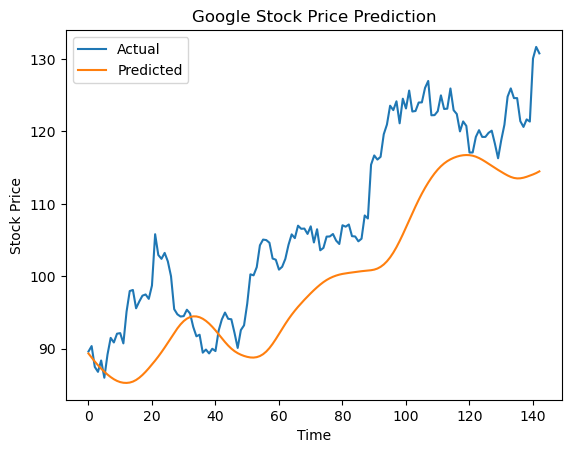

In [46]:
# Predict
predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)

# Actual prices
real_price = test_data[['Open']].values

# Plot
plt.plot(real_price, label='Actual')
plt.plot(predicted_price, label='Predicted')
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()